In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [47]:
np.random.seed(42)
plt.style.use("default")

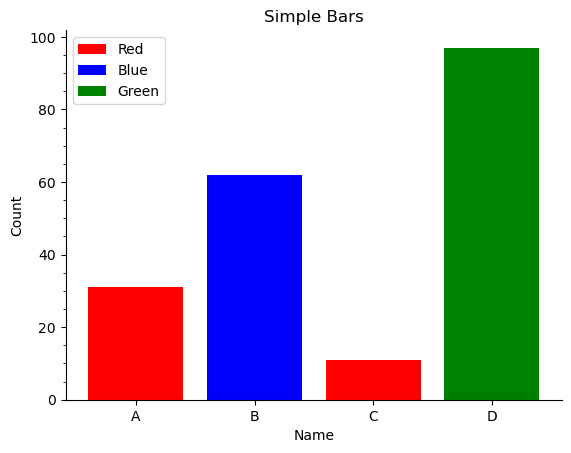

In [51]:
# 简单柱状图
fig, ax = plt.subplots()
x = ["A", "B", "C", "D"]
y = np.random.randint(10, 100, 4)
lables = ["Red", "Blue", "_Red", "Green"]
colors = ["red", "blue", "red", "green"]
ax.bar(x, y, color=colors, label=lables)
ax.legend()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("Simple Bars")
ax.set_xlabel("Name")
ax.set_ylabel("Count")
# 设置主刻度
ax.set_yticks(np.arange(0, 120, 20))
# 设置子刻度
ax.set_yticks(np.arange(0,105,5), minor=True)

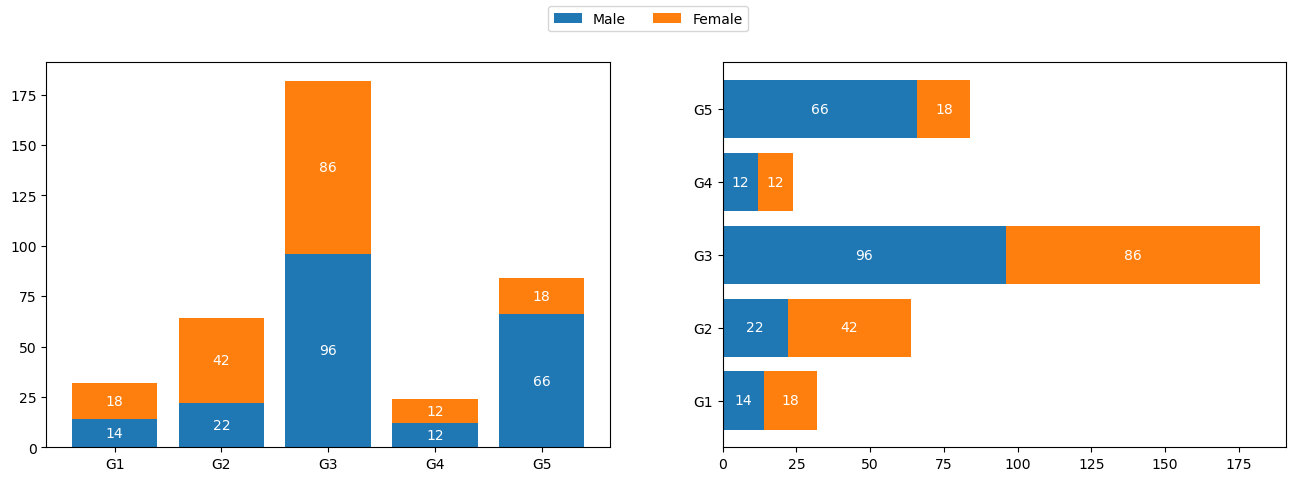

In [18]:
import pandas as pd
import numpy as np


np.random.seed(42)


np.random.seed()
df = pd.DataFrame(
    {   
        "Group": ["G1", "G2", "G3", "G4", "G5"],
        "Female": np.random.randint(0, 100, 5),
        "Male": np.random.randint(0, 100, 5),
    }
)
data = df.melt(id_vars="Group", var_name="Gender", value_name="Count")
fig, axs = plt.subplots(1,2 ,figsize=(16, 5))
ax1: plt.Axes = axs[0]
bottoms = np.zeros(5)
groups = data.groupby("Gender", as_index=False)
for label, group in groups:
    my_bar = ax1.bar(group["Group"], group["Count"], bottom=bottoms, label=label)
    ax1.bar_label(my_bar, label_type="center", color="white")
    bottoms += group["Count"]

ax2: plt.Axes = axs[1]
lefts = np.zeros(5)
for label, group in groups:
    my_bar = ax2.barh(group["Group"], group["Count"], left=lefts, label=label)
    ax2.bar_label(my_bar, label_type="center", color="white")
    lefts += group["Count"]
    
fig.legend(["Male", "Female"], loc="upper center",ncol=2)


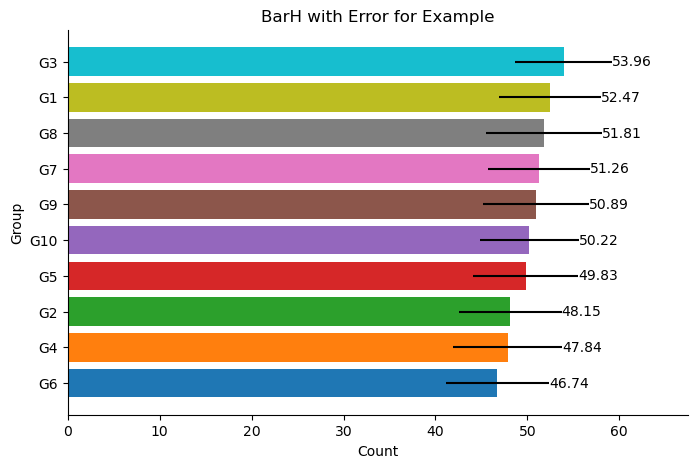

In [82]:
# 带置信区间的柱状图
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.stats.weightstats import DescrStatsW
from matplotlib import colormaps

# 数据
n = 10
groups  = [f"G{i+1}" for i in range(n)]
data = pd.DataFrame(
    {
        i: np.random.randint(0,100,100)
        for i in groups
    }
).melt(var_name="Group", value_name="Count")

data = data.groupby("Group", as_index=False).agg(
    Mean=("Count", "mean"),
    Error=("Count", lambda x:DescrStatsW(x).tconfint_mean()[1] - x.mean())
).sort_values(by="Mean")

# 绘图
fig: plt.Figure
ax: plt.Axes
fig, ax = plt.subplots(figsize=(8, 5))
colors = colormaps['tab10']

# 绘制柱状图
barh = ax.barh(data["Group"], data["Mean"], xerr=data["Error"], color=colors(range(n)))
# 绘制标签
ax.bar_label(barh)
#调整X轴范围
ax.set_xlim(right=data["Mean"].max() * 1.25)
# 设置标题
ax.set_title("BarH with Error for Example")
# 设置标签
ax.set_xlabel("Count")
ax.set_ylabel("Group")

# 设置主题
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)


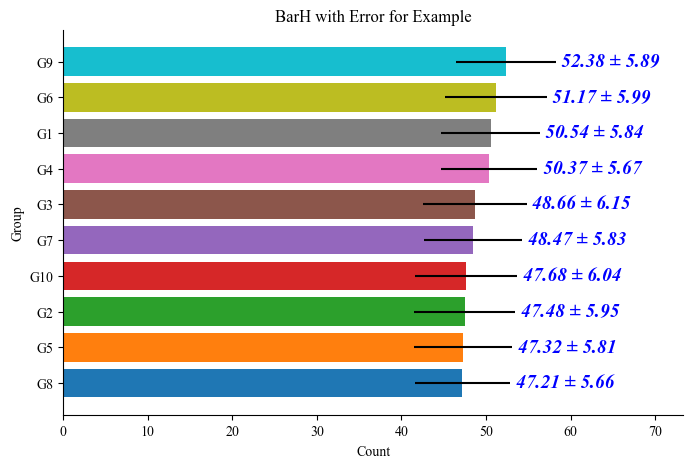

In [107]:
# 带置信区间的柱状图
# 调整柱标签格式
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.stats.weightstats import DescrStatsW
from matplotlib import colormaps


np.random.seed(42)
plt.rcParams["font.family"] = "Times New Roman"


# 数据
n = 10
groups  = [f"G{i+1}" for i in range(n)]
data = pd.DataFrame(
    {
        i: np.random.randint(0,100,100)
        for i in groups
    }
).melt(var_name="Group", value_name="Count")

data = data.groupby("Group", as_index=False).agg(
    Mean=("Count", "mean"),
    Error=("Count", lambda x:DescrStatsW(x).tconfint_mean()[1] - x.mean())
).sort_values(by="Mean")

# 绘图
fig: plt.Figure
ax: plt.Axes
fig, ax = plt.subplots(figsize=(8, 5))
colors = colormaps['tab10']

# 绘制柱状图
barh = ax.barh(data["Group"], data["Mean"], xerr=data["Error"], color=colors(range(n)))
# 绘制标签
ax.bar_label(
    barh,
    labels=[f"{m:.2f} ± {e:.2f}" for m, e in zip(data["Mean"], data["Error"])],
    color="blue",
    padding=4,
    size=14,
    weight="bold",
    family="Times New Roman",
    style="italic"
    
)
#调整X轴范围
ax.set_xlim(right=data["Mean"].max() * 1.4)
# 设置标题
ax.set_title("BarH with Error for Example")
# 设置标签
ax.set_xlabel("Count")
ax.set_ylabel("Group")

# 设置主题
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)


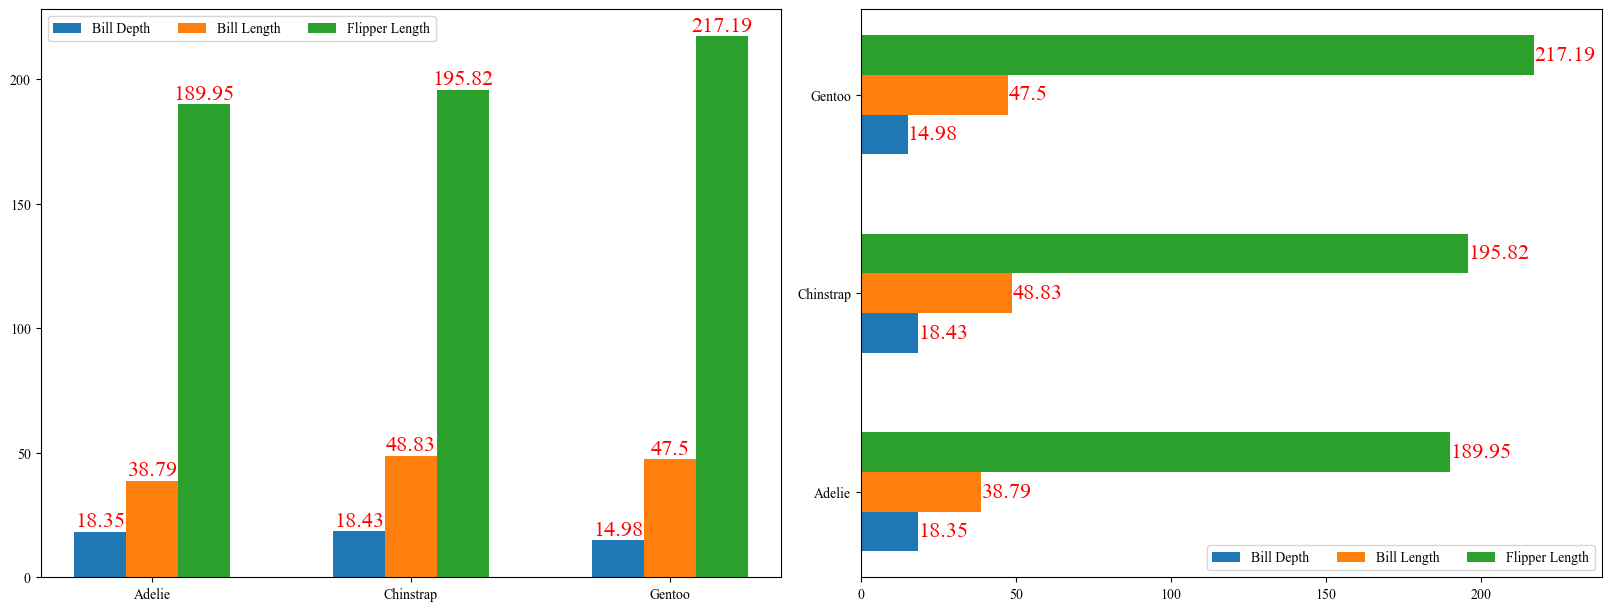

In [150]:
# 带标签的分组柱状体
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = pd.DataFrame({
    "Species": ("Adelie", "Chinstrap", "Gentoo"),
    'Bill Depth': (18.35, 18.43, 14.98),
    'Bill Length': (38.79, 48.83, 47.50),
    'Flipper Length': (189.95, 195.82, 217.19),
})
long_data = data.melt(id_vars="Species", var_name="Var", value_name="Value")
groups = long_data.groupby(by="Var", as_index=False)


fig, axs = plt.subplots(1, 2, figsize=(16, 6), layout="constrained")
ax1: plt.Axes = axs[0]
width = 0.2
offset = 0
x = data["Species"].index
for label, group in groups:
    bar = ax1.bar(x + offset, group["Value"], width=width, label=label)
    ax1.bar_label(bar, color="red", fontsize=16)
    offset += width
ax1.legend(ncols=len(groups))
ax1.set_xticks(x + width, data["Species"].values)

ax2: plt.Axes = axs[1]
height = 0.2
offset = 0
for label, group in groups:
    bar = ax2.barh(x + offset, group["Value"], height=height, label=label)
    ax2.bar_label(bar, color="red", fontsize=16)
    offset += height
ax2.legend(ncols=len(groups))
ax2.set_yticks(x + width, data["Species"].values)
_ = ax2.set_xlim(right=long_data["Value"].max() * 1.1)



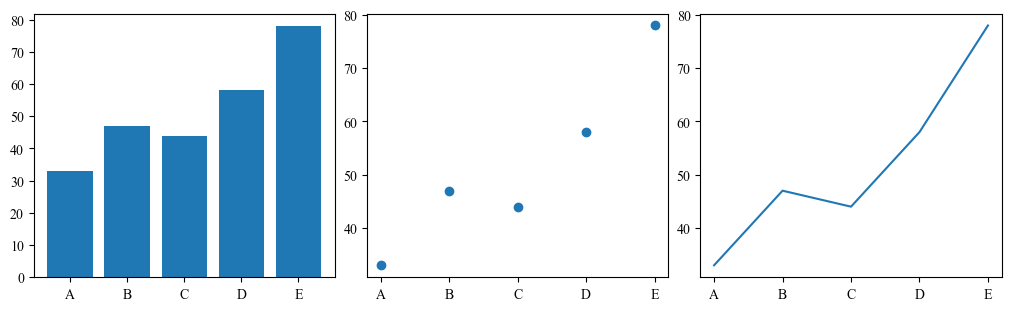

In [172]:
# 绘制分类变量
data = pd.DataFrame(
    {
        i: np.random.randint(10,100,1)
        for i in "ABCDE"
    }
).melt(var_name="Var", value_name="Value")
fig, axs = plt.subplots(1, 3, figsize=(10,3), layout="constrained")
ax0: plt.Axes = axs[0]
ax1: plt.Axes = axs[1]
ax2: plt.Axes = axs[2]
ax0.bar(data["Var"], data["Value"])
ax1.scatter(data["Var"], data["Value"])
ax2.plot(data["Var"], data["Value"])


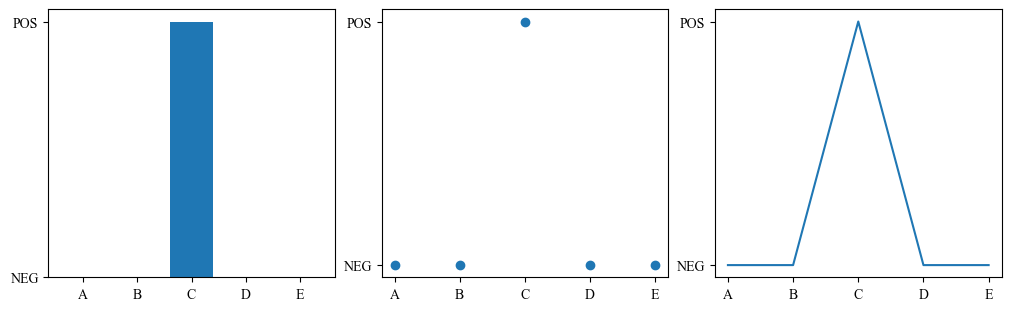

In [201]:
# 横纵坐标都是分类变量
data = pd.DataFrame(
    {
        i: ["POS" if np.random.randn() > 0 else "NEG"]
        for i in "ABCDE"
    }
).melt(var_name="Var", value_name="Value")
fig, axs = plt.subplots(1, 3, figsize=(10,3), layout="constrained")
ax0: plt.Axes = axs[0]
ax1: plt.Axes = axs[1]
ax2: plt.Axes = axs[2]
ax0.bar(data["Var"], data["Value"])
ax1.scatter(data["Var"], data["Value"])
ax2.plot(data["Var"], data["Value"])

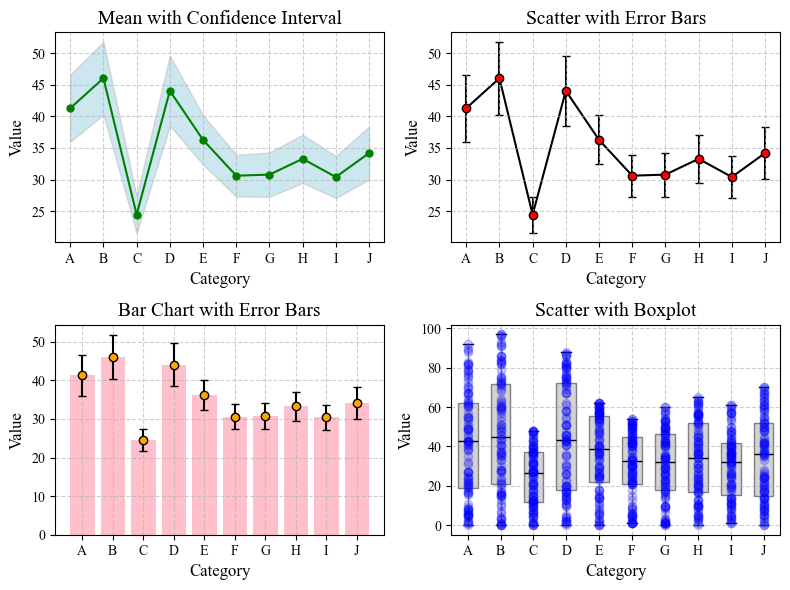

In [336]:
from statsmodels.stats.weightstats import DescrStatsW
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 数据
data = pd.DataFrame({
    i : np.random.randint(0, np.random.randint(50, 100, 1), 100)
    for i in "ABCDEFGHIJ"
})
long_data = data.melt(var_name="Var", value_name="Value")
mean_data = long_data.groupby(by="Var", as_index=False).agg(
    Mean=("Value", "mean"),
    CI_low=("Value", lambda x: DescrStatsW(x).tconfint_mean()[0]),
    CI_high=("Value", lambda x: DescrStatsW(x).tconfint_mean()[1]),
)

# 绘图
fig, axs = plt.subplots(2, 2, figsize=(8, 6))

# ax0: 线图 + 置信区间
ax0 = axs[0, 0]
ax0.plot(mean_data["Var"], mean_data["Mean"], color="green", marker="o", markersize=5, label="Mean", zorder=2)
ax0.fill_between(mean_data["Var"], mean_data["CI_low"], mean_data["CI_high"], facecolor='lightblue', edgecolor="silver", alpha=0.6)
ax0.set_title("Mean with Confidence Interval", fontsize=14)
ax0.set_xlabel("Category", fontsize=12)
ax0.set_ylabel("Value", fontsize=12)
ax0.grid(True, linestyle='--', alpha=0.6)

# ax1: 散点图 + 误差条
ax1 = axs[0, 1]
ax1.scatter(mean_data["Var"], mean_data["Mean"], zorder=2, facecolor="red", edgecolor="black", label="Mean")
ax1.errorbar(mean_data["Var"], mean_data["Mean"], yerr=mean_data["CI_high"] - mean_data["Mean"], 
             capsize=3, linestyle="solid", color="black", zorder=1)
ax1.set_title("Scatter with Error Bars", fontsize=14)
ax1.set_xlabel("Category", fontsize=12)
ax1.set_ylabel("Value", fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.6)

# ax2: 条形图 + 误差条
ax2 = axs[1, 0]
ax2.bar(mean_data["Var"], mean_data["Mean"], color="pink", label="Mean", zorder=1)
ax2.errorbar(mean_data["Var"], mean_data["Mean"], yerr=mean_data["CI_high"] - mean_data["Mean"], 
             capsize=3, fmt="o", markerfacecolor="orange", markeredgecolor="black", color="black", zorder=2)
ax2.set_title("Bar Chart with Error Bars", fontsize=14)
ax2.set_xlabel("Category", fontsize=12)
ax2.set_ylabel("Value", fontsize=12)
ax2.grid(True, linestyle='--', alpha=0.6)

# ax3: 散点图 + 箱线图
ax3 = axs[1, 1]
ax3.scatter(long_data["Var"], long_data["Value"], alpha=0.2, label="Scatter", color="blue", zorder=2)
ax3.boxplot([long_data[long_data["Var"] == var]["Value"] for var in long_data["Var"].unique()], 
            positions=np.arange(len(long_data["Var"].unique())), widths=0.6, patch_artist=True, 
            boxprops=dict(facecolor='lightgray', color='gray'), whiskerprops=dict(color="gray"), 
            flierprops=dict(markerfacecolor="red", marker="o", markersize=5), 
            medianprops=dict(color="black"), zorder=1)
ax3.set_title("Scatter with Boxplot", fontsize=14)
ax3.set_xlabel("Category", fontsize=12)
ax3.set_ylabel("Value", fontsize=12)
ax3.set_xticks(np.arange(len(long_data["Var"].unique())))
ax3.set_xticklabels(long_data["Var"].unique())
ax3.grid(True, linestyle='--', alpha=0.6)

# 调整子图间距
plt.tight_layout()

# 显示图形
plt.show()
